In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df = df.iloc[:,2:]

In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
df.shape

(400, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [13]:
x_train.shape

(280, 2)

In [14]:
x_test.shape

(120, 2)

In [15]:
y_train.shape

(280,)

In [16]:
y_test.shape

(120,)

In [17]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [18]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [19]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [21]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fit the scalar to the train set, it will learn the parameter
scalar.fit(x_train)


StandardScaler()

In [28]:
# transfrom the train and test set
x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [29]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [30]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [31]:
x_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [32]:
# While transforming the x_train and x_test we prove the DataFrame,
# after tranformation it returns the x_train_scaled and x_test_scaled as numpu array.
# now conver this numpy array again into pandas DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [33]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [35]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [36]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

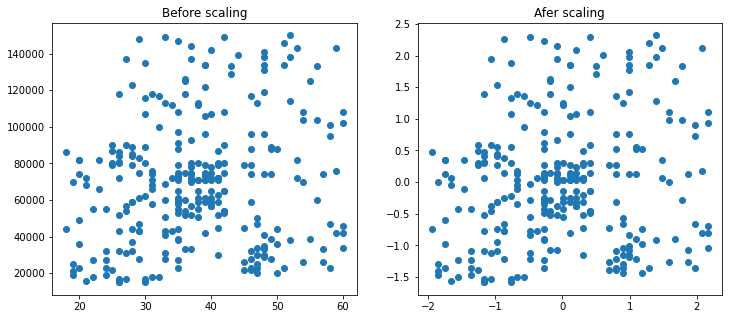

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title("Afer scaling")
plt.show()

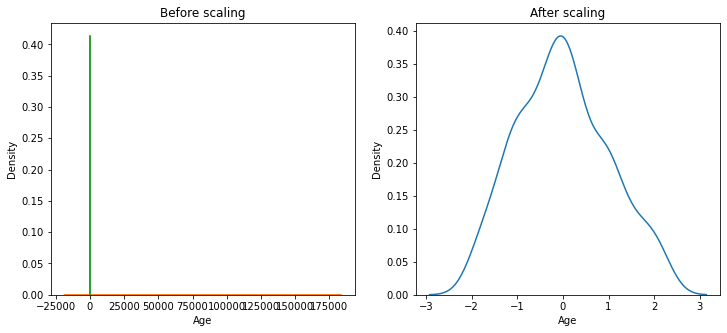

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
# After scalling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax1)
plt.show()

## Comparision Distribution

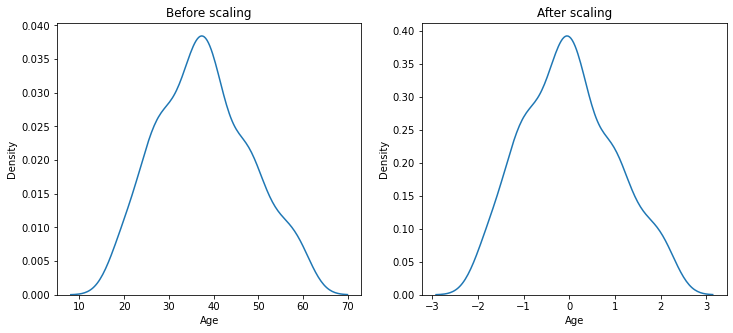

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Age'], ax=ax1)

# After scalling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

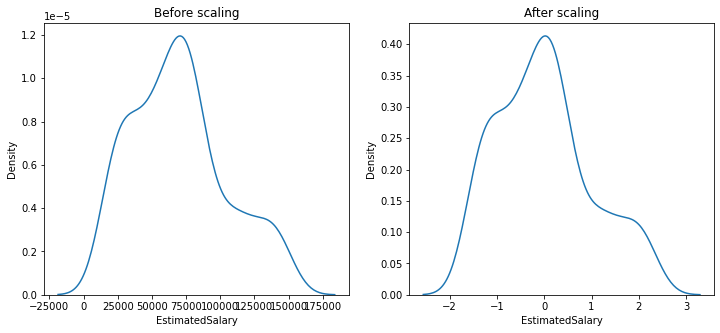

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After scalling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Why scaling is important

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [52]:
y_pread = lr.predict(x_test)

In [53]:
y_pread_scaled = lr_scaled.predict(x_test_scaled)

In [56]:
from sklearn.metrics import accuracy_score
print("Actul", accuracy_score(y_test, y_pread))
print("Scaled", accuracy_score(y_test, y_pread_scaled))

Actul 0.6583333333333333
Scaled 0.8666666666666667


## Effect of Outlier

In [64]:
df = df.append(pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000, 250000,350000], 'Purchased':[0, 1, 1]}))

In [69]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0.0
1,35,20000,0.0
2,26,43000,0.0
3,27,57000,0.0
4,19,76000,0.0
...,...,...,...
1,90,250000,1.0
2,95,350000,1.0
0,5,1000,0.0
1,90,250000,1.0


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [72]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fit the scalar to the train set, it will learn the parameter
scalar.fit(x_train)

StandardScaler()

In [74]:
# transfrom the train and test set
x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [76]:
# While transforming the x_train and x_test we prove the DataFrame,
# after tranformation it returns the x_train_scaled and x_test_scaled as numpu array.
# now conver this numpy array again into pandas DataFrame
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

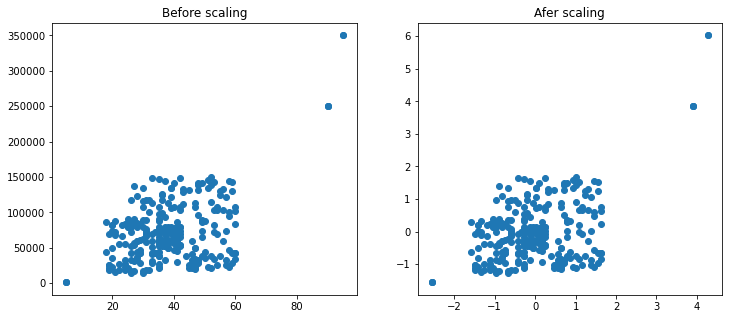

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title("Afer scaling")
plt.show()

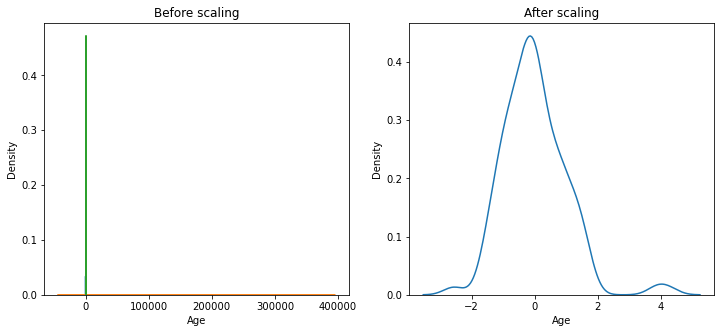

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
# After scalling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax1)
plt.show()

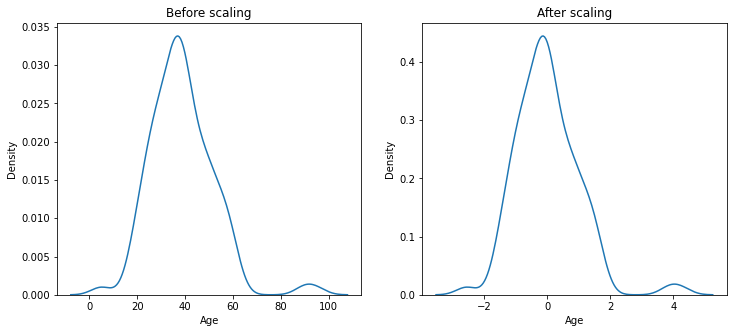

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['Age'], ax=ax1)

# After scalling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

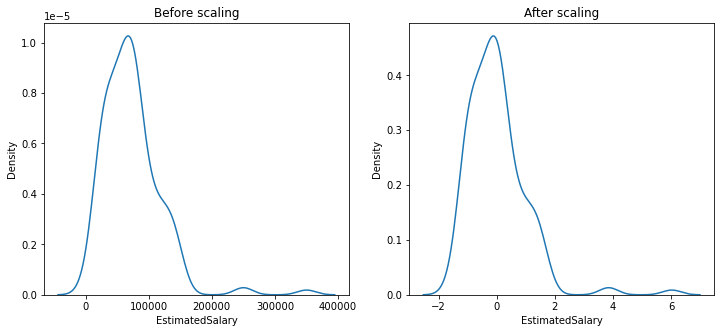

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
# before scalling
ax1.set_title("Before scaling")
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After scalling
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()